#classification using naive bayes and svm.
#steps:
1.Preprocessing-->Looking at data check for empty value,check for datatype.

2.if yes data cleaning--> filling blank values and encoding

3.splitting the data--> vertical (x,y),horizontal split.

4.Maching learning.

In [ ]:
#importing
import pandas as pd #---->handling ,loading dataset (for dataset viewing and manipulation)-->data cleaning and encoding
import numpy as np #--->values maipulation
import sklearn #--->model creation , training, testing, remodelling
import matplotlib.pyplot as plt #--->data visualization (it is a library which returns something)
%matplotlib inline
#--->(the returned dictionary will be crafted and displayed)
print("Imported!")

Imported!


In [ ]:
file=pd.read_csv("/content/heart-missing-classification-dataset.csv")
file

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,NaN,NaN
3,56.0,1.0,1.0,120.0,NaN,0.0,1.0,178.0,0.0,NaN,2.0,NaN,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


In [ ]:
file.isna().sum()#--->gives the nan values in each col

age                    12
sex                     7
chest_pain_type         2
resting_bp             11
cholestoral            15
fasting_blood_sugar     4
restecg                 6
max_hr                 16
exang                   2
oldpeak                14
slope                  11
num_major_vessels      10
thal                    9
target                 12
dtype: int64

In [ ]:
file["alphabet"]=[x for x in range(len(file["age"]))]
file["alphabet"]=file["alphabet"].astype(str)

In [ ]:
print(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  291 non-null    float64
 1   sex                  296 non-null    float64
 2   chest_pain_type      301 non-null    float64
 3   resting_bp           292 non-null    float64
 4   cholestoral          288 non-null    float64
 5   fasting_blood_sugar  299 non-null    float64
 6   restecg              297 non-null    float64
 7   max_hr               287 non-null    float64
 8   exang                301 non-null    float64
 9   oldpeak              289 non-null    float64
 10  slope                292 non-null    float64
 11  num_major_vessels    293 non-null    float64
 12  thal                 294 non-null    float64
 13  target               291 non-null    float64
 14  alphabet             303 non-null    object 
dtypes: float64(14), object(1)
memory usage: 

In [ ]:
#if obj is present--->one hot encoder
#else drop the column...
#now in this case there is no object so no need to do the above mentioned things

In [ ]:
file=file.drop("alphabet",axis=1)
file

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,NaN,NaN
3,56.0,1.0,1.0,120.0,NaN,0.0,1.0,178.0,0.0,NaN,2.0,NaN,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


In [13]:
#filling the blank cells of dataset
file=file.fillna(file.mean())
file.isna().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

In [19]:
#splitting
from sklearn.model_selection import train_test_split #--->for horizontal split

#vertical splitting
x=file.drop("target",axis=1)
y=file["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2)

In [16]:
x_train

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal
155,58.000000,0.000000,0.000000,130.000000,197.000000,0.0,1.000000,131.000000,0.0,0.600000,1.000000,0.0,2.000000
20,59.000000,1.000000,0.000000,135.000000,234.000000,0.0,1.000000,161.000000,0.0,1.060208,1.000000,0.0,3.000000
273,58.000000,1.000000,0.000000,100.000000,234.000000,0.0,1.000000,156.000000,0.0,0.100000,2.000000,1.0,3.000000
74,54.388316,0.000000,2.000000,122.000000,213.000000,0.0,1.000000,165.000000,0.0,0.200000,1.000000,0.0,2.000000
15,50.000000,0.000000,2.000000,131.705479,219.000000,0.0,1.000000,158.000000,0.0,1.060208,1.000000,0.0,2.000000
232,55.000000,1.000000,0.000000,160.000000,289.000000,0.0,0.000000,145.000000,1.0,0.800000,1.000000,1.0,3.000000
130,54.000000,0.000000,2.000000,160.000000,201.000000,0.0,1.000000,163.000000,0.0,0.000000,2.000000,1.0,2.000000
199,65.000000,1.000000,0.000000,110.000000,248.000000,0.0,0.000000,158.000000,0.0,0.600000,2.000000,2.0,1.000000
2,41.000000,0.000000,1.000000,130.000000,204.000000,0.0,0.000000,172.000000,0.0,1.400000,2.000000,0.0,2.319728
98,43.000000,1.000000,2.000000,130.000000,315.000000,0.0,1.000000,162.000000,0.0,1.900000,1.390411,1.0,2.000000


In [20]:
x_test

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal
263,63.000000,0.0,0.0,108.0,269.000000,0.0,1.0,169.0,1.0,1.8,1.0,2.000000,2.0
62,54.388316,1.0,3.0,118.0,246.385417,0.0,0.0,190.0,0.0,0.0,1.0,0.000000,1.0
174,60.000000,1.0,0.0,130.0,206.000000,0.0,0.0,132.0,1.0,2.4,1.0,2.000000,3.0
112,54.388316,0.0,2.0,140.0,246.385417,0.0,1.0,133.0,0.0,0.2,2.0,0.000000,3.0
163,38.000000,1.0,2.0,138.0,175.000000,0.0,1.0,173.0,0.0,0.0,2.0,4.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.000000,0.0,0.0,140.0,241.000000,0.0,1.0,123.0,1.0,0.2,1.0,0.000000,3.0
156,47.000000,1.0,2.0,130.0,253.000000,0.0,1.0,179.0,0.0,0.0,2.0,0.000000,2.0
143,67.000000,0.0,0.0,106.0,223.000000,0.0,1.0,142.0,0.0,0.3,2.0,2.000000,2.0
259,38.000000,1.0,3.0,120.0,231.000000,0.0,1.0,182.0,1.0,3.8,1.0,0.000000,3.0


In [18]:
y_train

155    1.000000
20     1.000000
273    0.000000
74     1.000000
15     1.000000
232    0.000000
130    1.000000
199    0.000000
2      0.525773
98     1.000000
302    0.000000
238    0.000000
124    1.000000
272    0.000000
145    1.000000
103    1.000000
105    1.000000
197    0.000000
47     1.000000
195    0.000000
255    0.000000
80     1.000000
284    0.000000
296    0.000000
78     1.000000
261    0.000000
96     1.000000
7      0.525773
93     1.000000
42     1.000000
88     0.525773
9      1.000000
52     1.000000
174    0.000000
298    0.000000
221    0.000000
33     1.000000
253    0.000000
295    0.000000
233    0.000000
187    0.000000
62     1.000000
267    0.000000
32     1.000000
227    0.000000
127    1.000000
40     1.000000
193    0.000000
246    0.000000
106    1.000000
216    0.000000
204    0.000000
154    1.000000
158    1.000000
55     1.000000
95     1.000000
139    1.000000
166    0.000000
133    1.000000
188    0.000000
Name: target, dtype: float64

In [21]:
y_test

263    0.0
62     1.0
174    0.0
112    1.0
163    1.0
      ... 
298    0.0
156    1.0
143    1.0
259    0.0
83     1.0
Name: target, Length: 243, dtype: float64

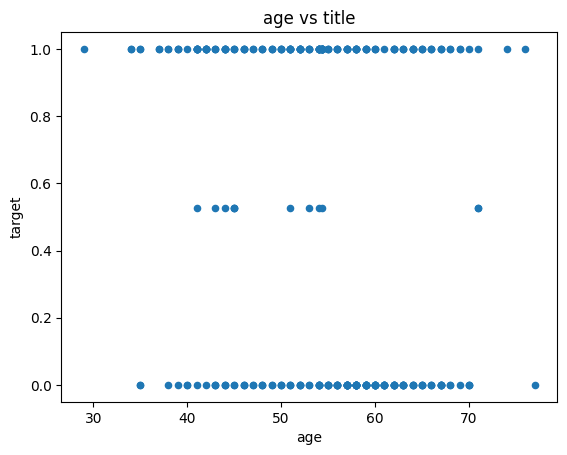

In [22]:
#plot
file.plot("age","target",title="age vs title", xlabel = "age", ylabel="target",kind="scatter");

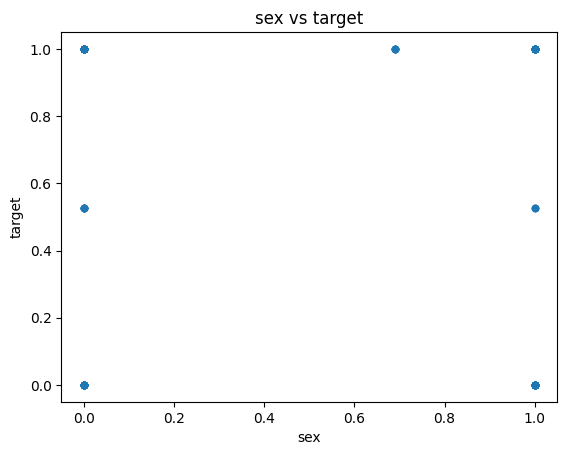

In [25]:
#plot
file.plot("sex","target",title="sex vs target", xlabel = "sex", ylabel="target",kind="scatter");

[Text(0.5, 1.0, 'um_major_vessels vs target'),
 Text(0.5, 0, 'um_major_vessels'),
 Text(0, 0.5, 'targets')]

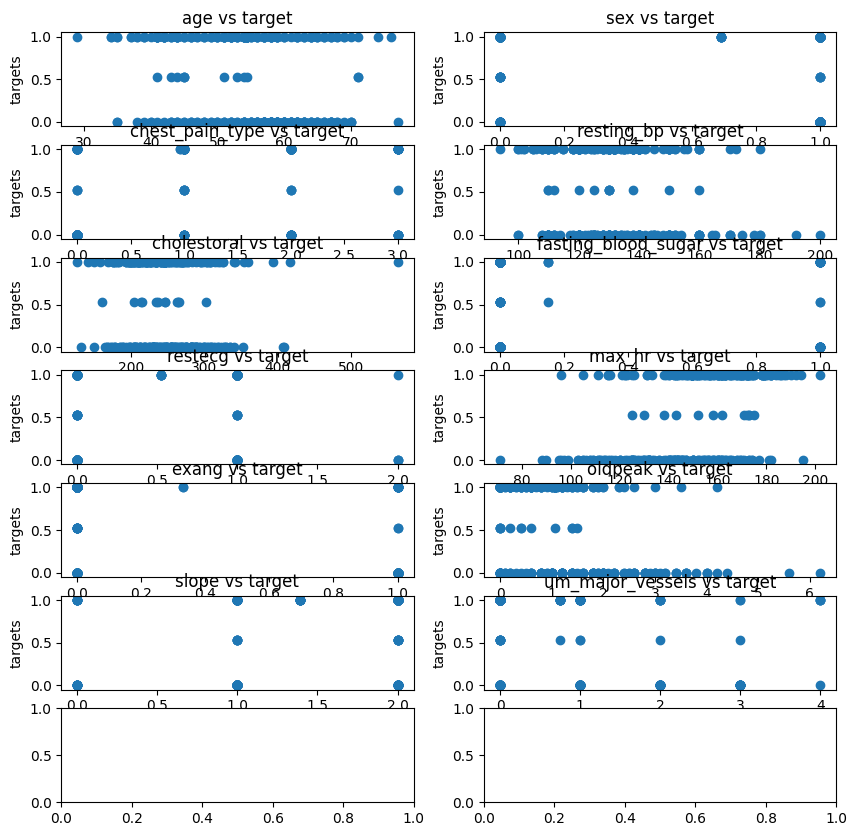

In [30]:
figure,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12),(ax13))=plt.subplots(nrows=7,ncols=2,figsize=(10,10));

ax1.scatter(file["age"],file["target"]);
ax1.set(title="age vs target",xlabel="age",ylabel="targets")
ax2.scatter(file["sex"],file["target"]);
ax2.set(title="sex vs target",xlabel="sex",ylabel="targets")
ax3.scatter(file["chest_pain_type"],file["target"]);
ax3.set(title="chest_pain_type vs target",xlabel="chest_pain_type",ylabel="targets")
ax4.scatter(file["resting_bp"],file["target"]);
ax4.set(title="resting_bp vs target",xlabel="resting_bp",ylabel="targets")
ax5.scatter(file["cholestoral"],file["target"]);
ax5.set(title="cholestoral vs target",xlabel="cholestoral",ylabel="targets")
ax6.scatter(file["fasting_blood_sugar"],file["target"]);
ax6.set(title="fasting_blood_sugar vs target",xlabel="fasting_blood_sugar",ylabel="targets")
ax7.scatter(file["restecg"],file["target"]);
ax7.set(title="restecg vs target",xlabel="restecg",ylabel="targets")
ax8.scatter(file["max_hr"],file["target"]);
ax8.set(title="max_hr vs target",xlabel="max_hr",ylabel="targets")
ax9.scatter(file["exang"],file["target"]);
ax9.set(title="exang vs target",xlabel="exang",ylabel="targets")
ax10.scatter(file["oldpeak"],file["target"]);
ax10.set(title="oldpeak vs target",xlabel="oldpeak",ylabel="targets")
ax11.scatter(file["slope"],file["target"]);
ax11.set(title="slope vs target",xlabel="slope",ylabel="targets")
ax12.scatter(file["num_major_vessels"],file["target"]);
ax12.set(title="um_major_vessels vs target",xlabel="um_major_vessels",ylabel="targets")



In [34]:
#ML
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.2)

In [35]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [36]:
#svm
from sklearn import svm
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.3029507298372103

In [37]:
#naive bayes
from sklearn import naive_bayes
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6186706622431355